<p>In this project, we work with a real-world dataset from kaggle https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data and guide you through the complete Machine Learning pipeline — from data exploration to building classification models and enhancing their performance.</p>

<p>🔍 Introduction
    Breast cancer is one of the most common cancers affecting women worldwide. Early and accurate diagnosis is critical to improving patient outcomes. In this project, we explore the use of various classification algorithms to predict whether a tumor is benign or malignant using the Breast Cancer Wisconsin dataset.</p>

<p>🎯 Objective
The main objective is to build and compare the performance of multiple machine learning models to identify the most accurate classifier for breast cancer diagnosis. The models evaluated include:</p>
<ul>
<li>Logistic Regression</li>

<li>Support Vector Machine (SVM)</li>

<li>K-Nearest Neighbors (KNN)</li>

<li>Naive Bayes</li>

<li>Decision Tree</li>

<li>Random Forest</li>
</ul>

<p>📊 Evaluation Metrics
We assess the performance of each model using the following metrics:</p>
<ul>
<li>Accuracy</li>

<li>Precision</li>

<li>Recall</li>

<li>F1 Score</li>

<li>Confusion Matrix</li>
</ul>
<p>By comparing these metrics, we aim to select the best-performing model for breast cancer classification and provide insights into its effectiveness in medical diagnosis.</p>

<h1>Logistic Regression</h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import csv file
data=pd.read_csv("/Users/pravaliparvataneni/Downloads/data.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [3]:
#used to know what type of data present in our dataset for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data['diagnosis']=l.fit_transform(data['diagnosis'])
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


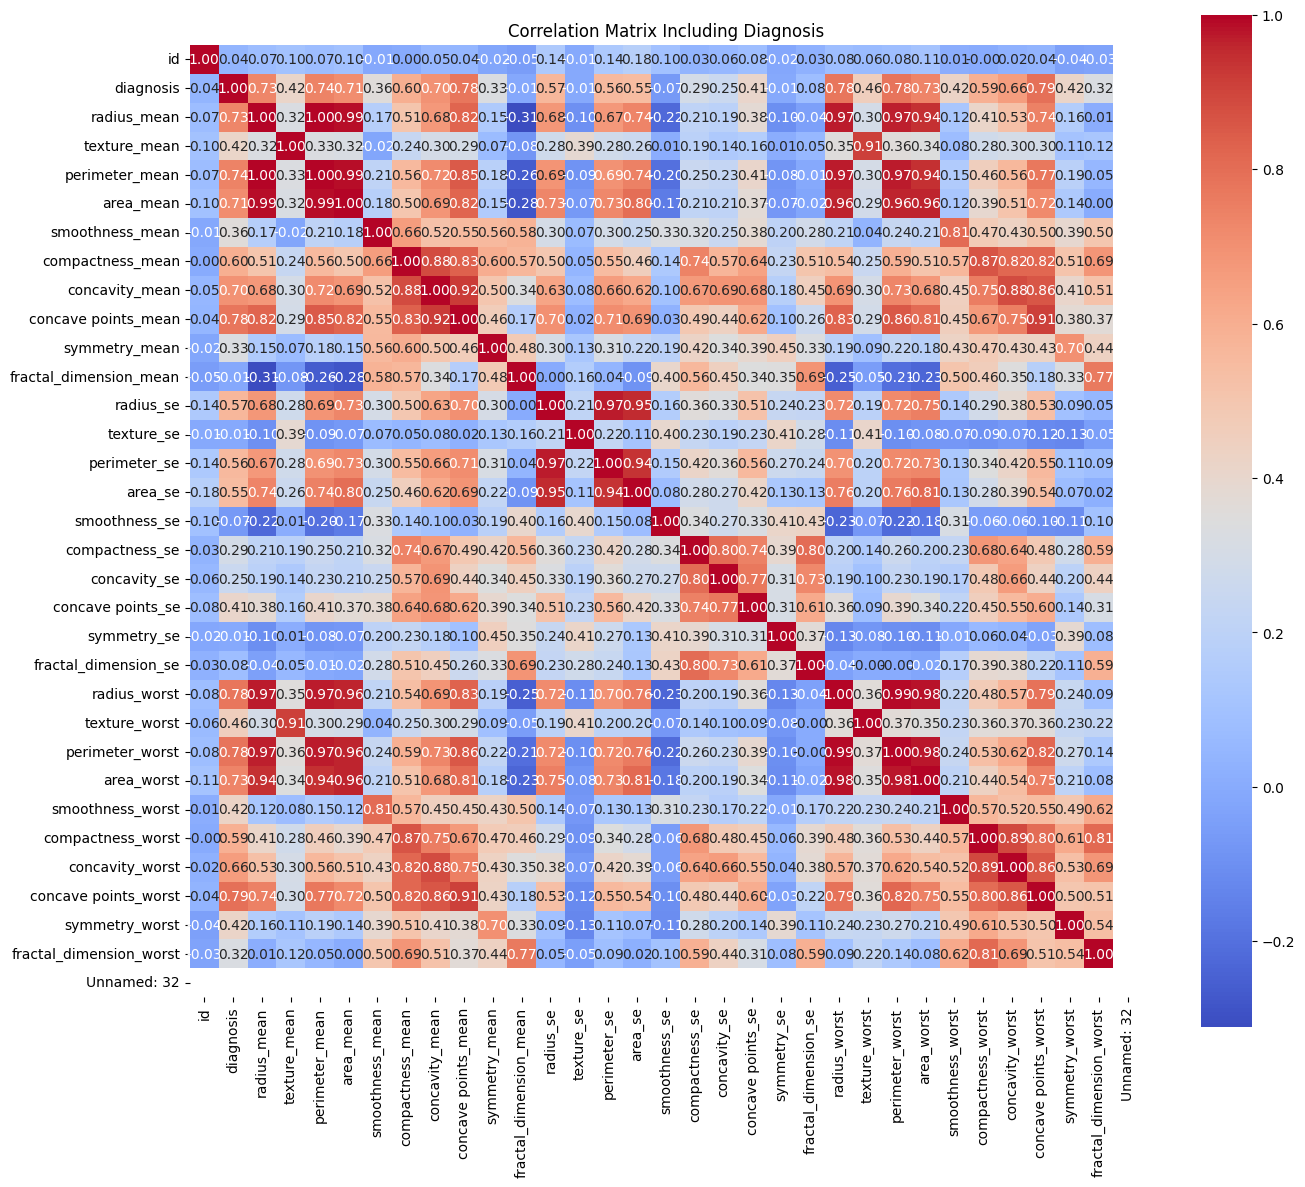

In [5]:
#Exploratory data Analysis
corr_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f', square=True)
plt.title('Correlation Matrix Including Diagnosis')
plt.tight_layout()
plt.show()

<p>These features have high positive correlation values with diagnosis, meaning higher values are typically associated with malignant tumors:</p>
<ul>
<li>>area_mean</li>
<li>radius_mean</li>
<li>perimeter_mean</li>
<li>concavity_mean</li>
<li>concave points_mean</li>
<li>area_worst</li>
<li>radius_worst</li>
<li>concave points_worst</ul>

<p>These features are negatively correlated, meaning higher values are associated with benign tumors:</p>
<ul>
<li>smoothness_mean</li>
<li>compactness_se</li>
<li>symmetry_se</li>
<li>fractal_dimension_se</li>
</ul>



In [6]:
#Separating dependent and independent variables
x=data.iloc[:,2:-1]
y=data.iloc[:,[1]]

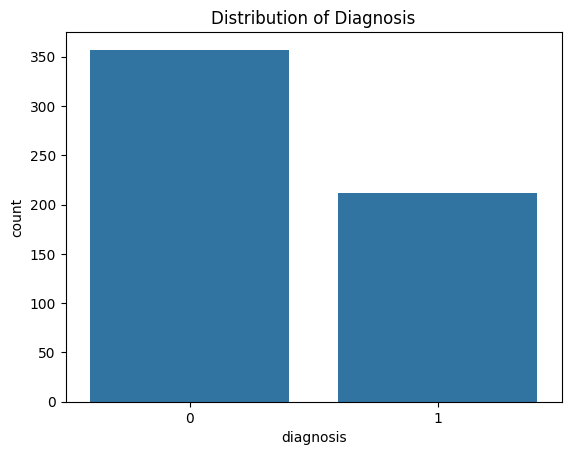

In [7]:
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

<p>In the above graph '0' indicates person not suffering from cancer</p>
<p>'1' indicates person is suffering from cancer</p>
<p>Less number of people are suffering from cancer</p>
<p>Majority of the people are not suffering from cancer</p>

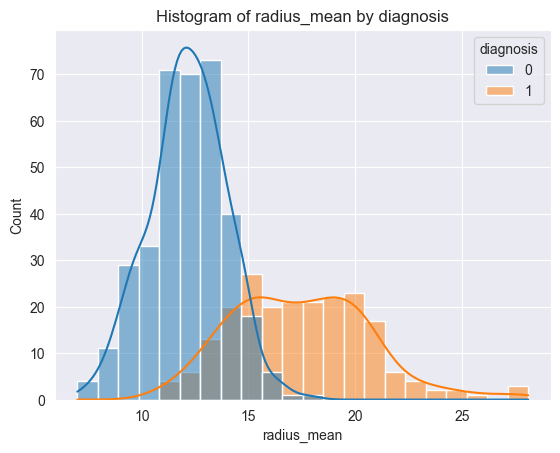

In [8]:
sns.set_style('darkgrid')
sns.histplot(data=data, x='radius_mean', hue='diagnosis', kde=True)
plt.title("Histogram of radius_mean by diagnosis")
plt.show()

<p>From the above plot, As the radius increases the probability of person having cancer is high</p>

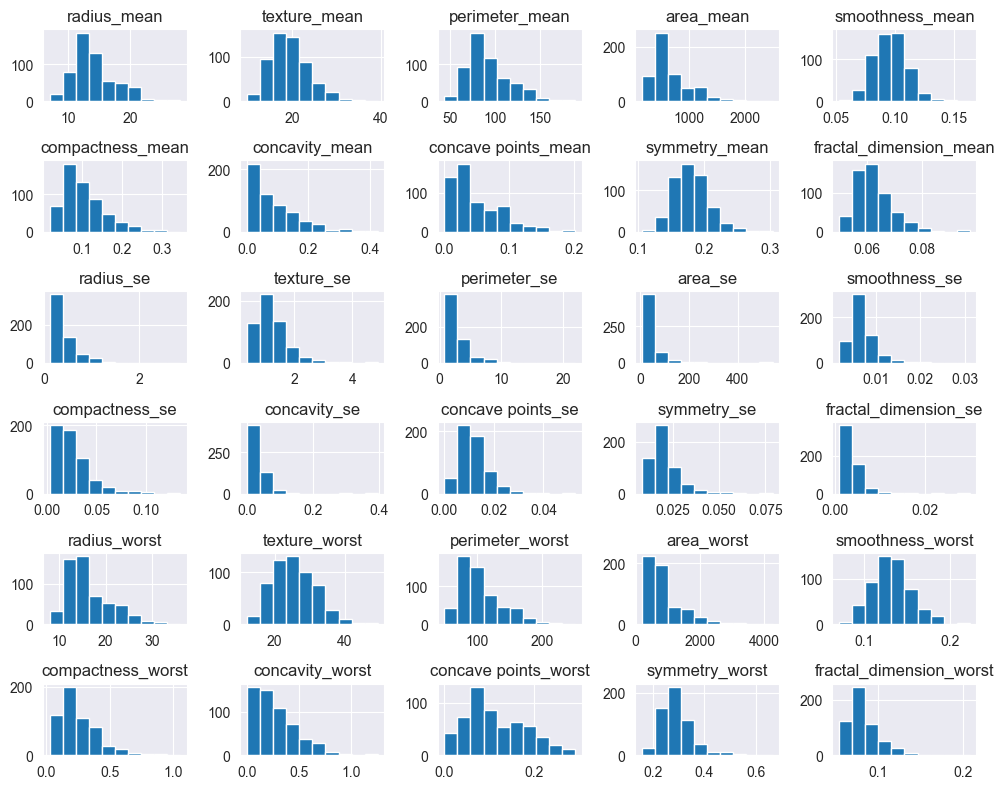

In [9]:
# Histograms for numerical features
data.iloc[:, 2:-1].hist(figsize=(10, 8))
plt.tight_layout()
plt.show()


<p>Features: concavity_mean, concave points_mean, etc.Two peaks suggest the presence of two natural subgroups — likely corresponding to benign vs malignant.These features might be highly discriminative in classification.</p>
<p>Features: Some texture- and smoothness-related features like texture_mean, smoothness_mean. have normal distribution</p>
<p>Several features show isolated bars far from the main cluster of values (e.g., area_worst, radius_worst).
These may correspond to large or fast-growing tumors, often malignant.</p>

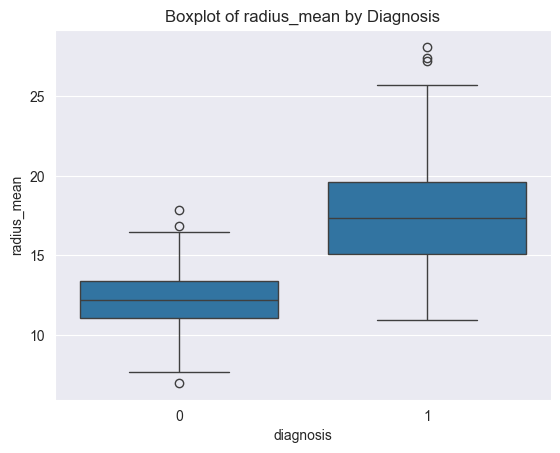

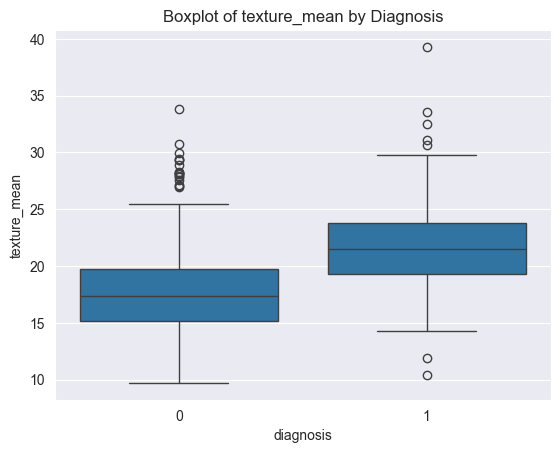

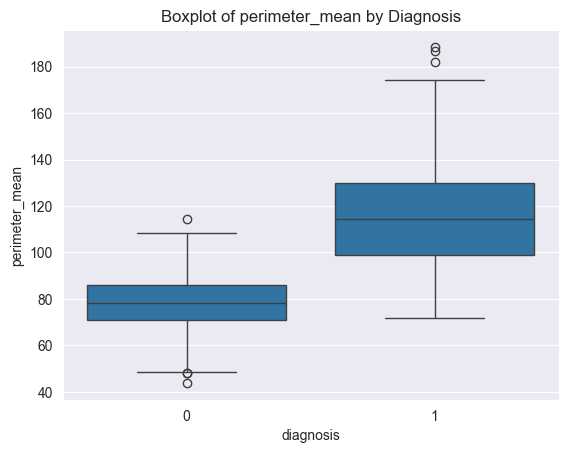

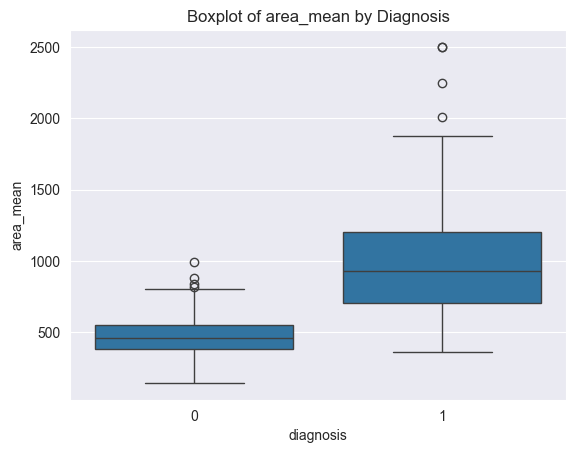

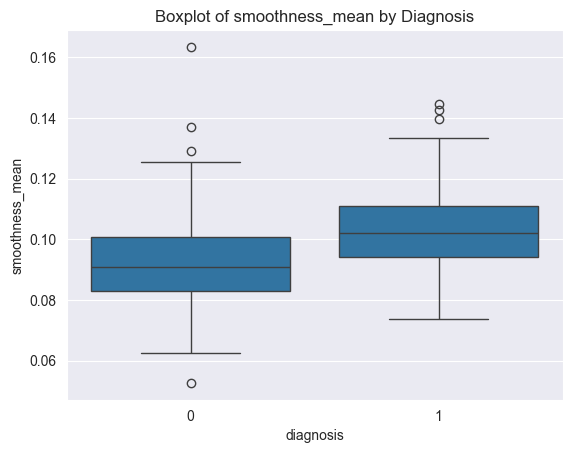

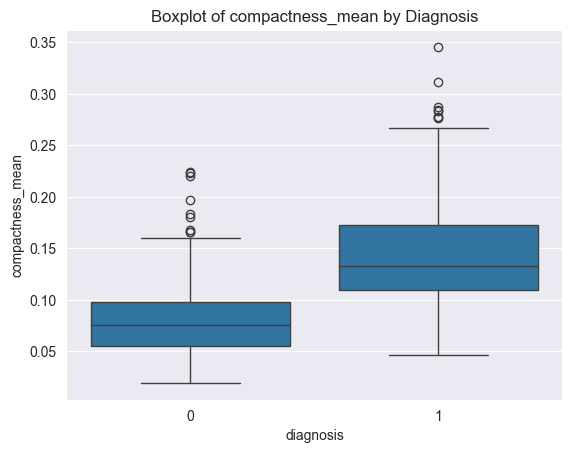

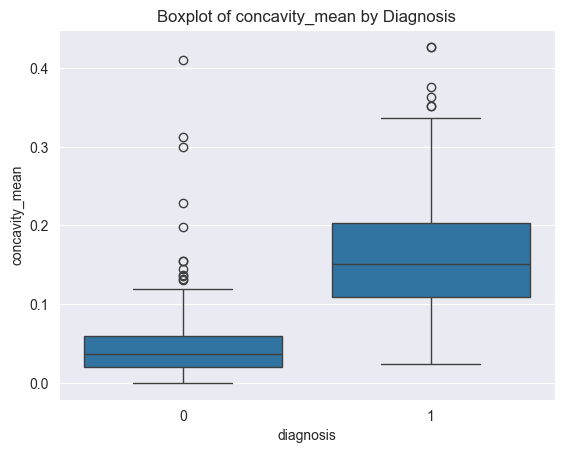

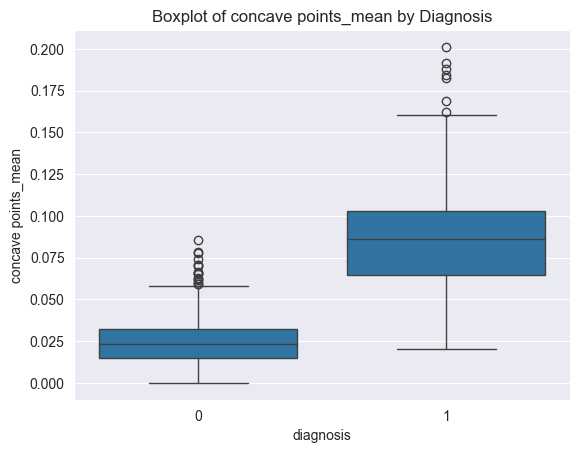

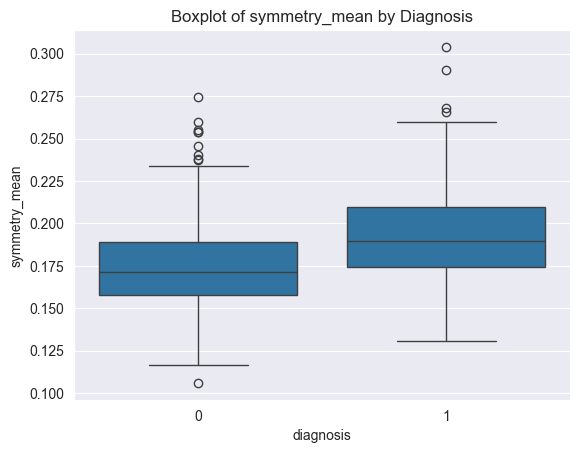

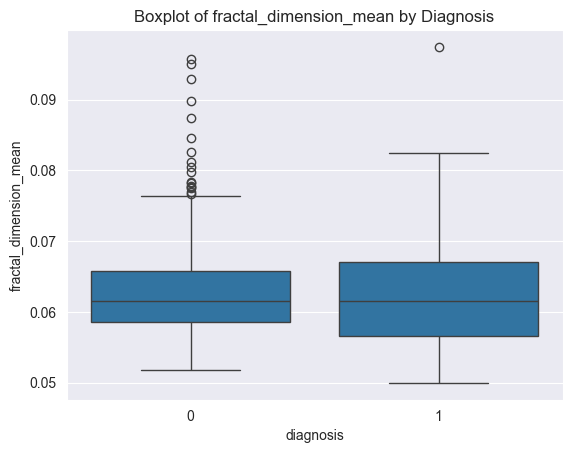

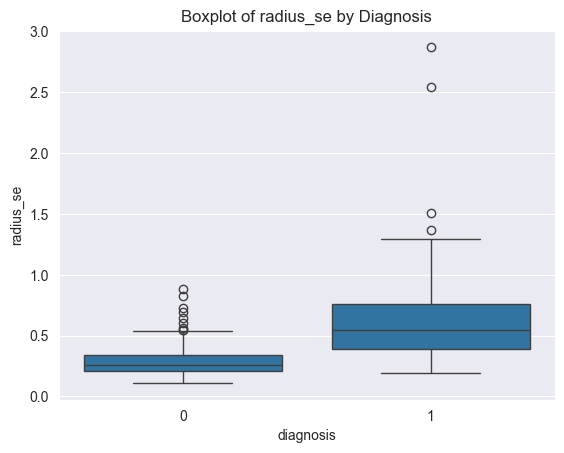

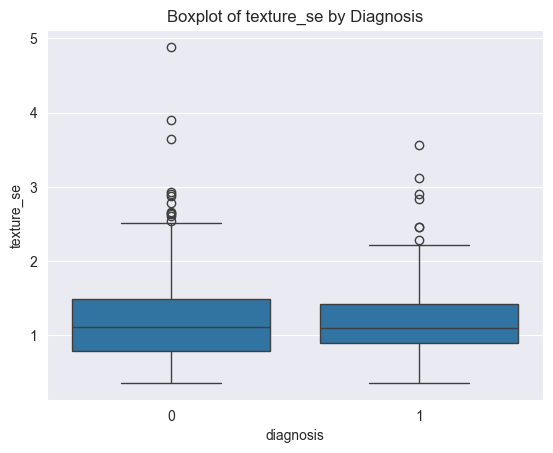

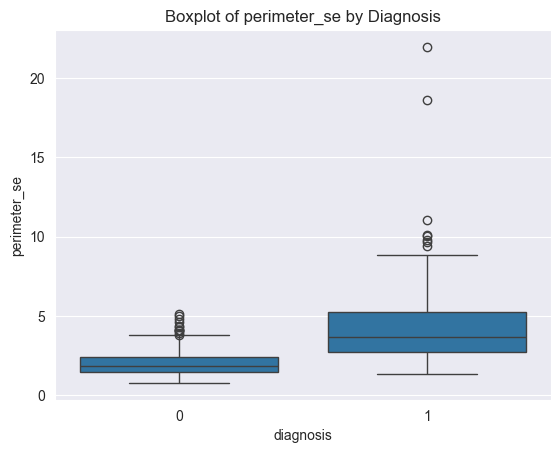

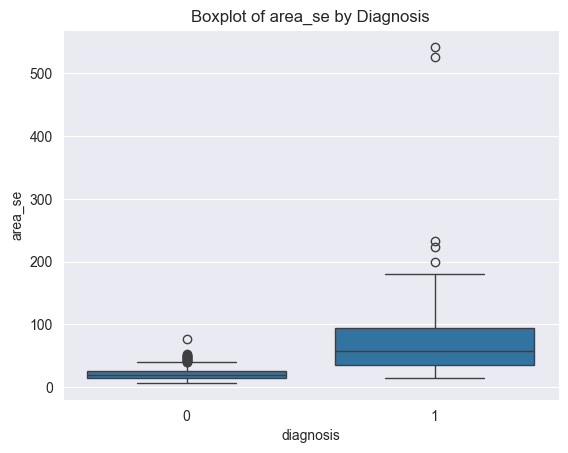

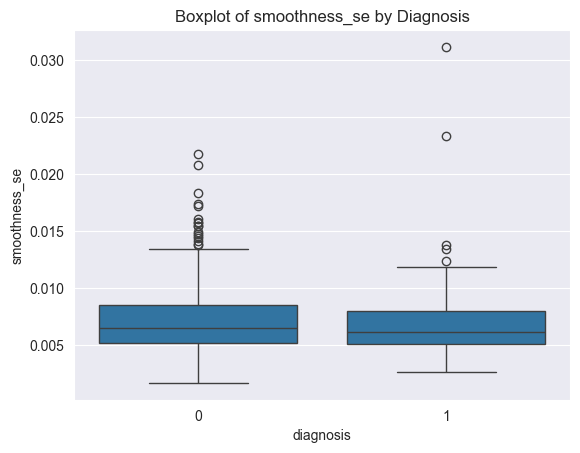

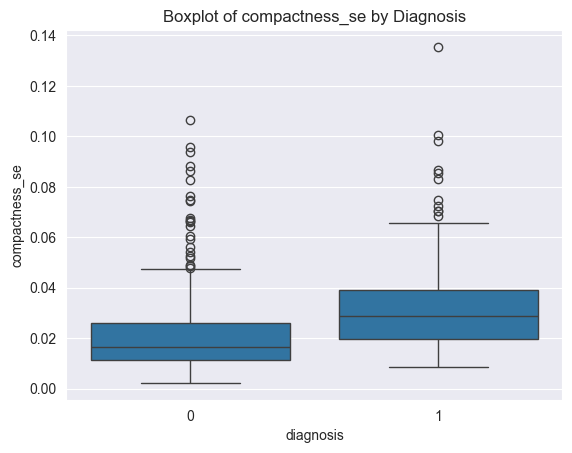

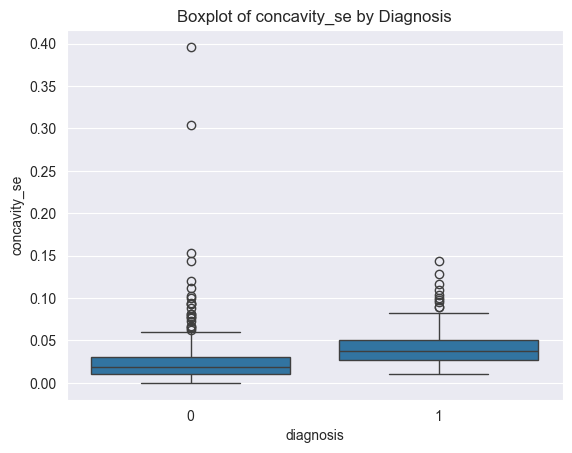

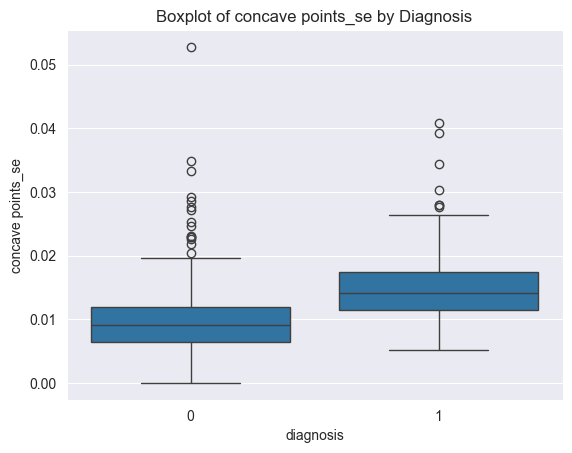

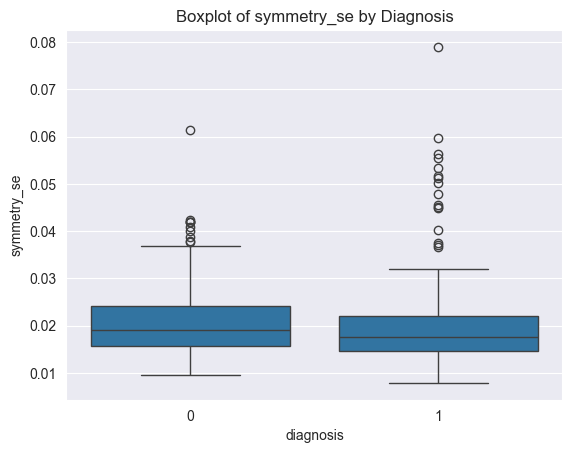

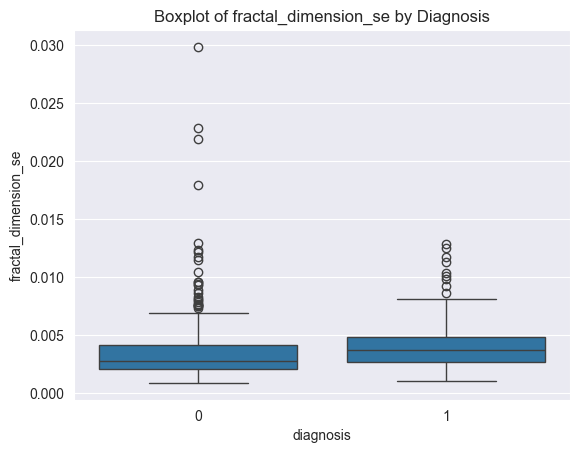

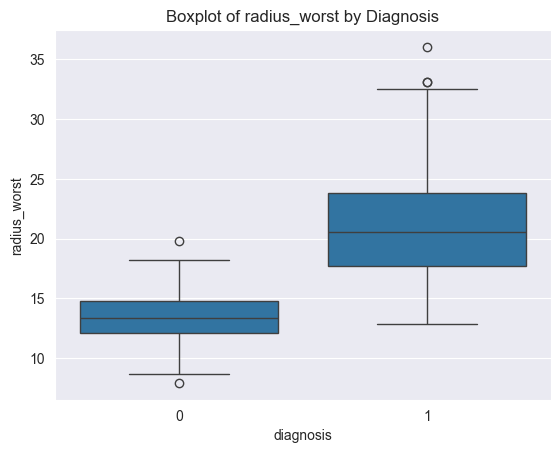

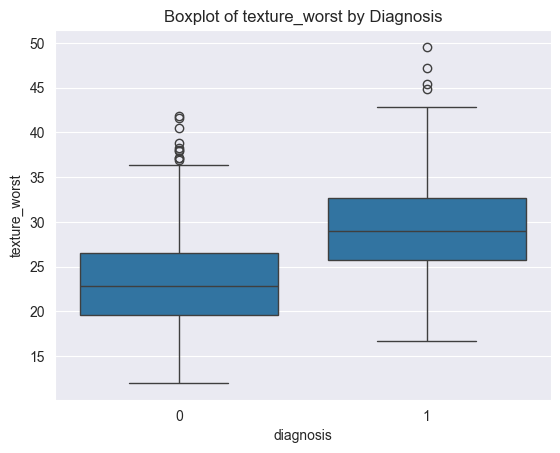

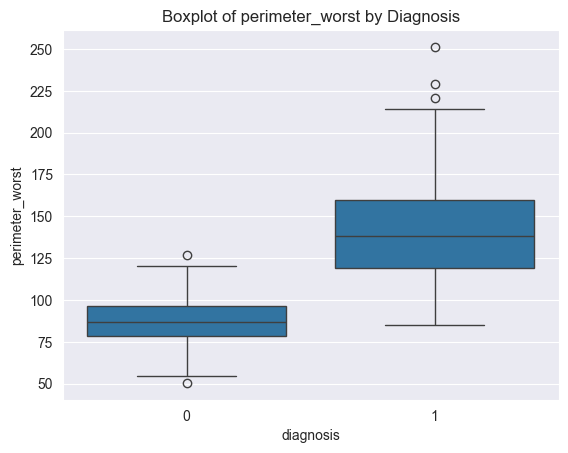

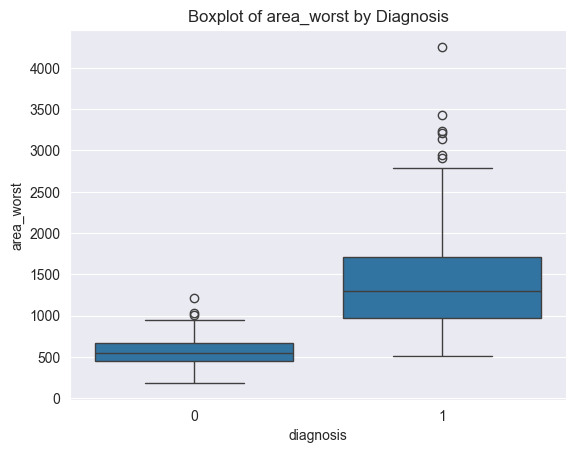

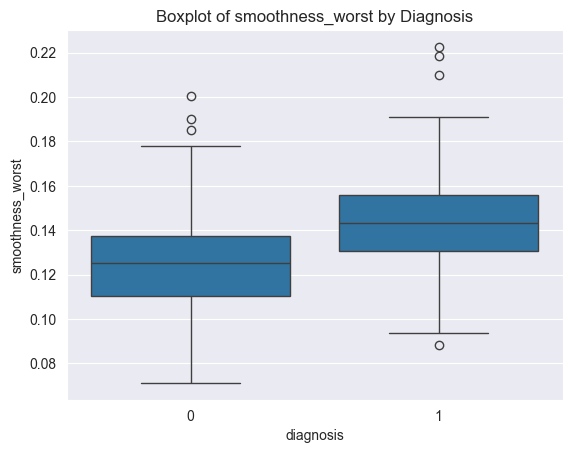

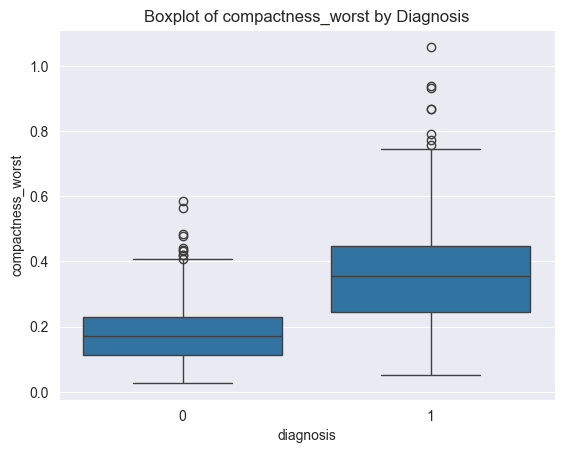

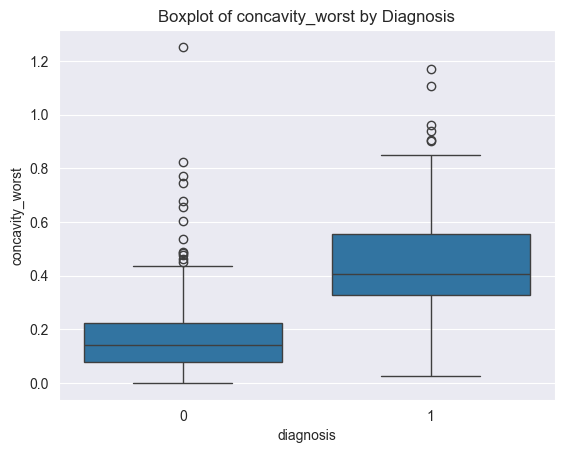

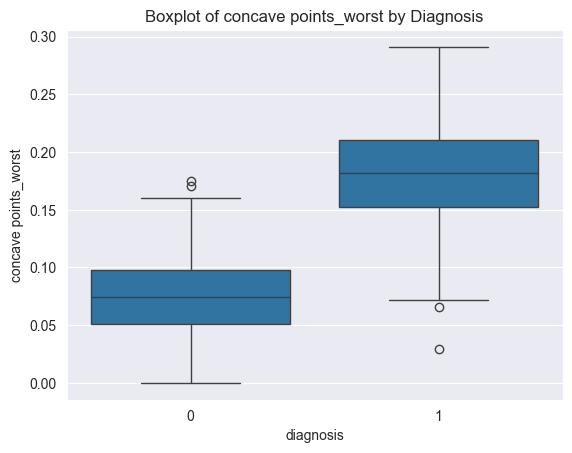

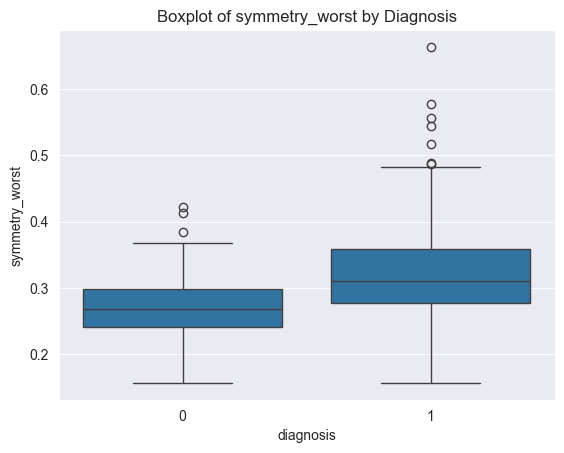

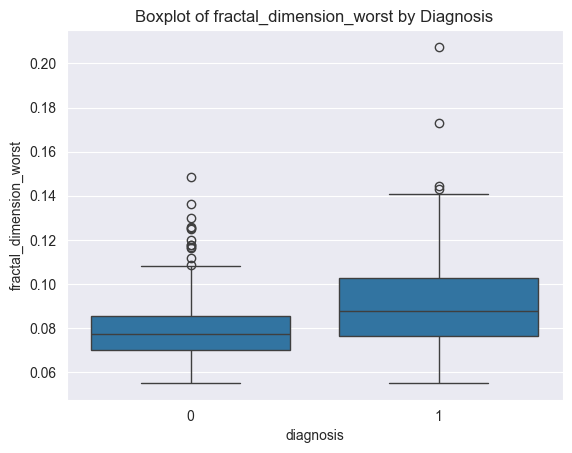

In [10]:
# Boxplots for numerical features
for col in data.columns[2:-1]:
    sns.boxplot(x='diagnosis', y=col, data=data)
    plt.title(f'Boxplot of {col} by Diagnosis')
    plt.show()

<ul>
    <li>Some features (especially size-related ones like area_mean, radius_worst) show outliers, particularly in the malignant class.These extreme values may represent aggressive or advanced tumors.</li>
    <li>Some features (like smoothness_mean or fractal_dimension_se) may show significant overlap between benign and malignant cases.These features may not be useful on their own for classification but might contribute in combination with others.</li>
    <li>Based on visual separation in boxplots, the most discriminative features include:

radius_mean

area_mean

perimeter_mean

concavity_mean

concave points_mean

These could be especially useful in building a classifier.</li>
</ul>

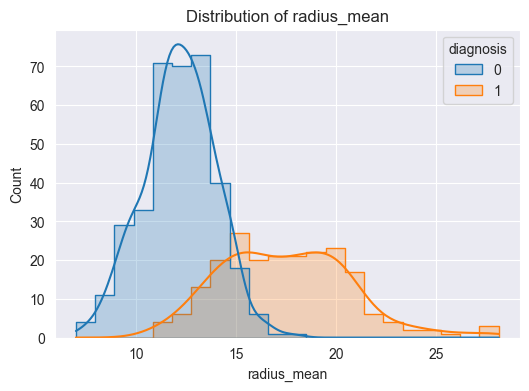

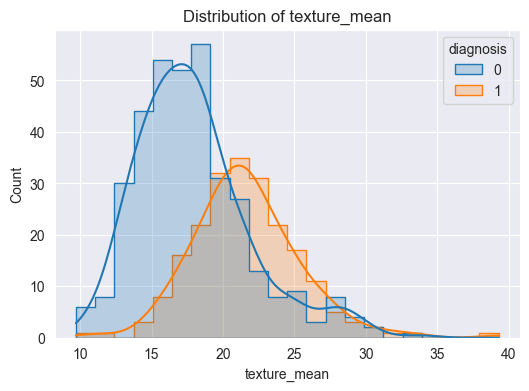

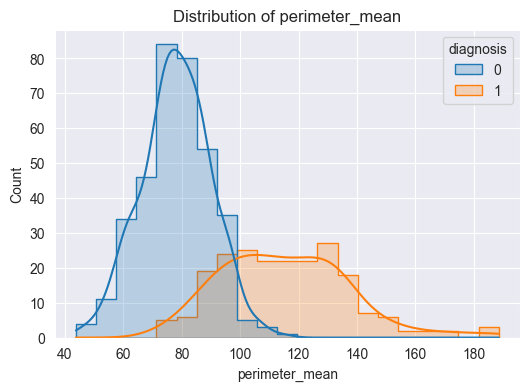

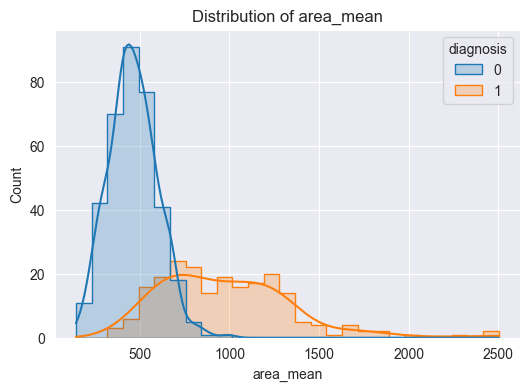

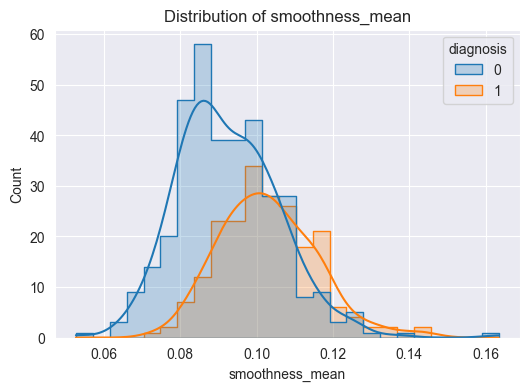

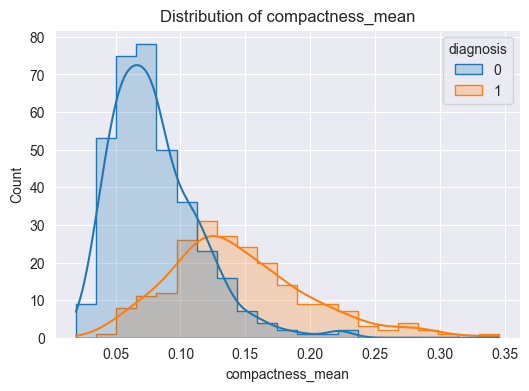

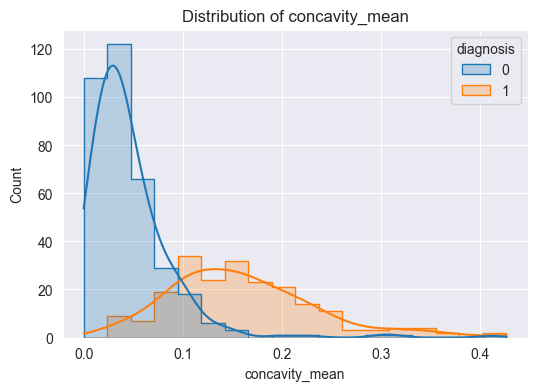

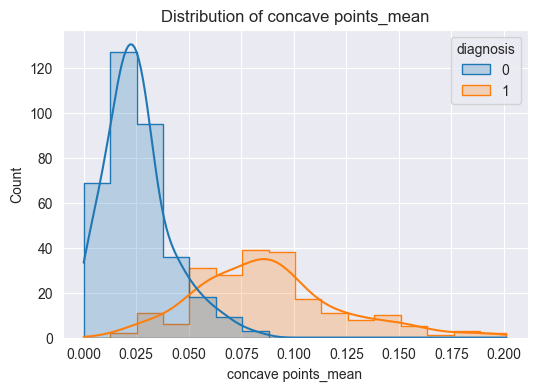

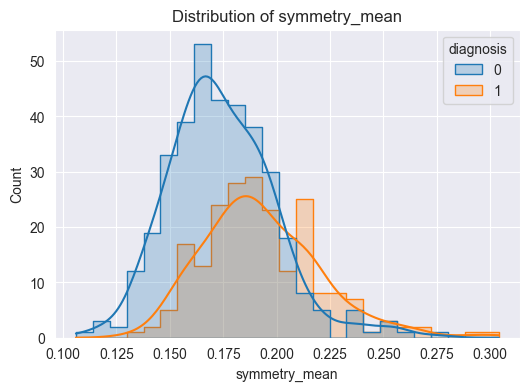

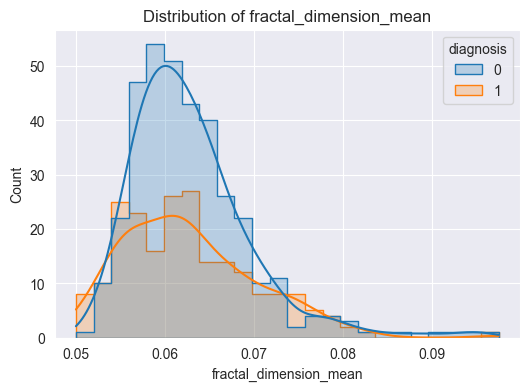

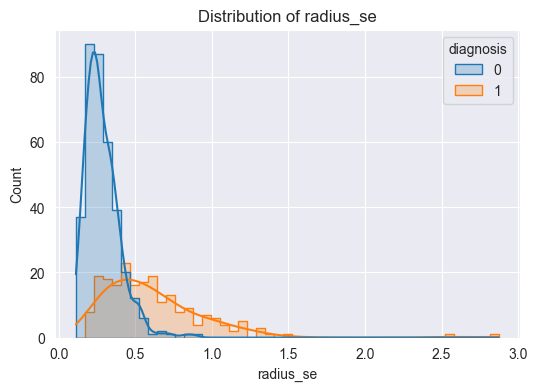

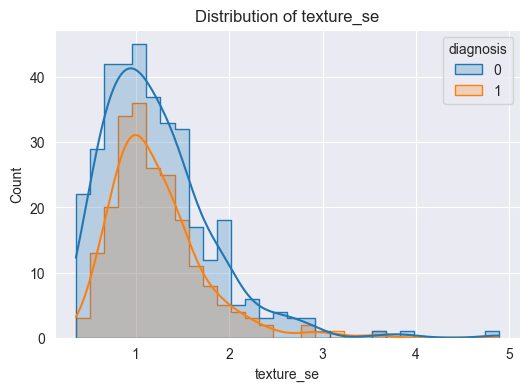

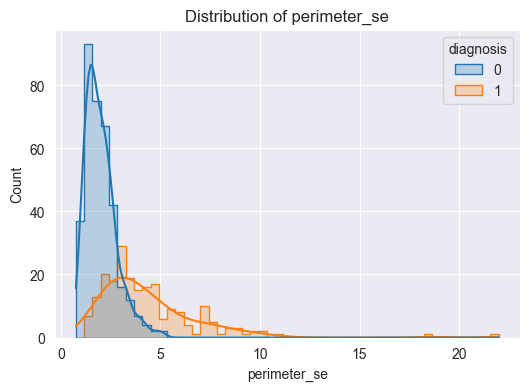

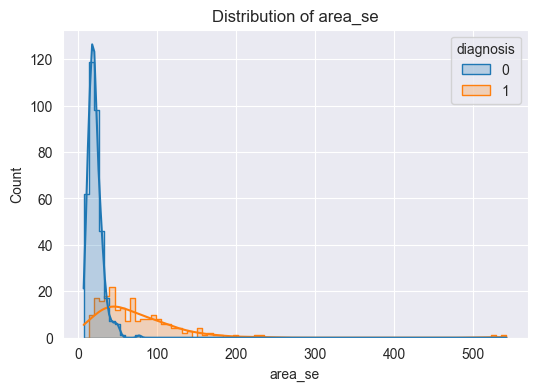

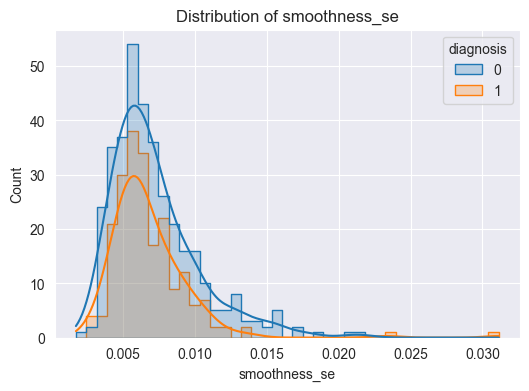

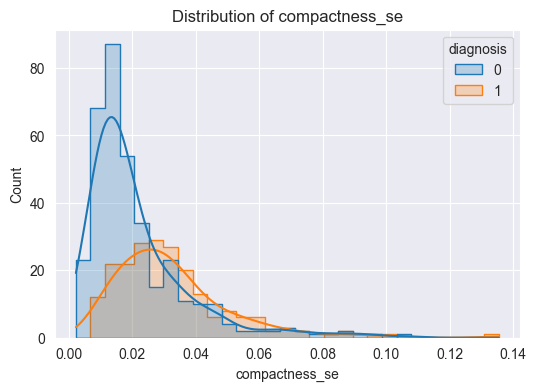

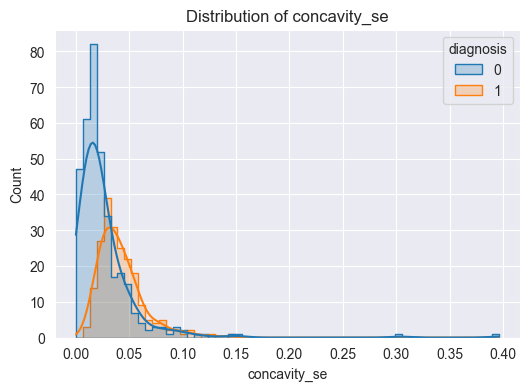

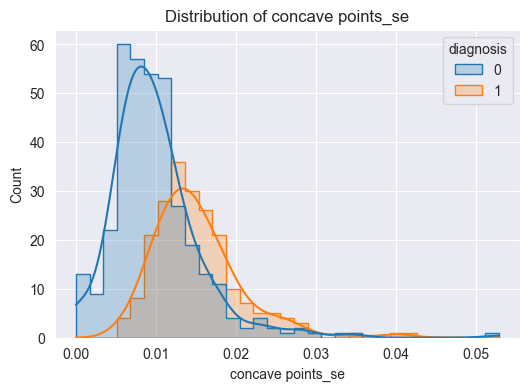

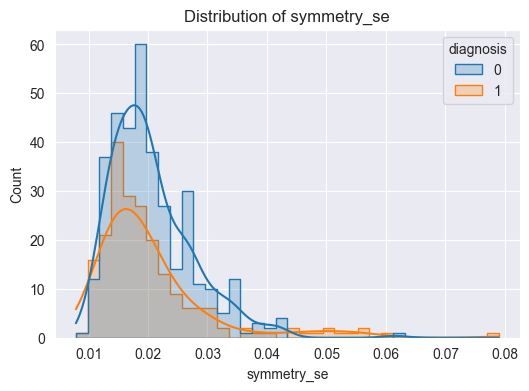

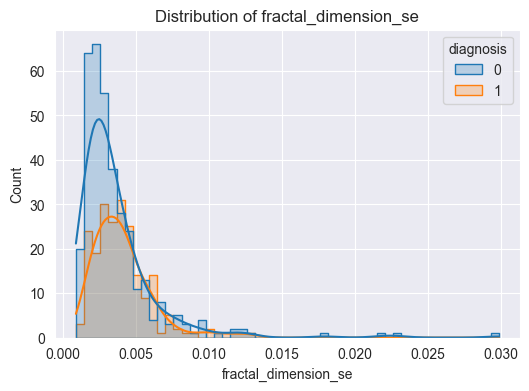

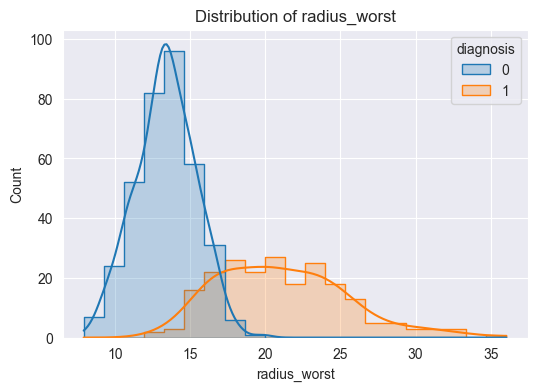

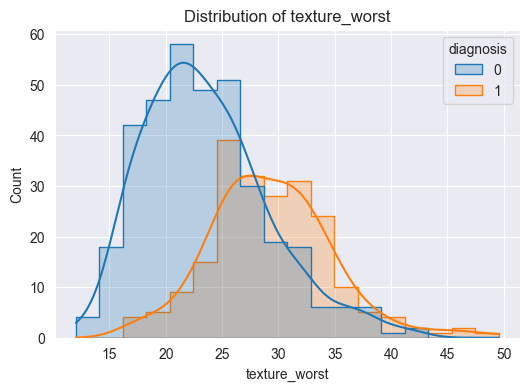

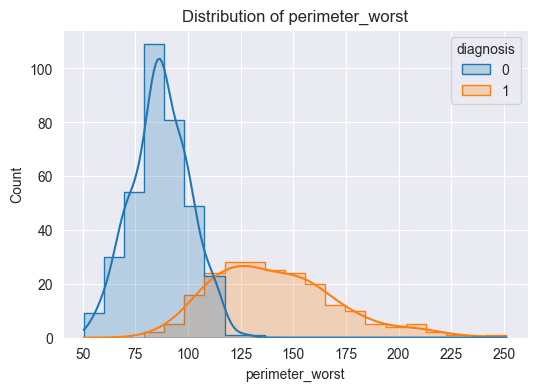

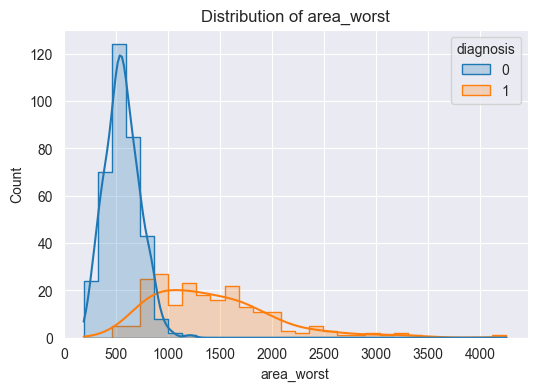

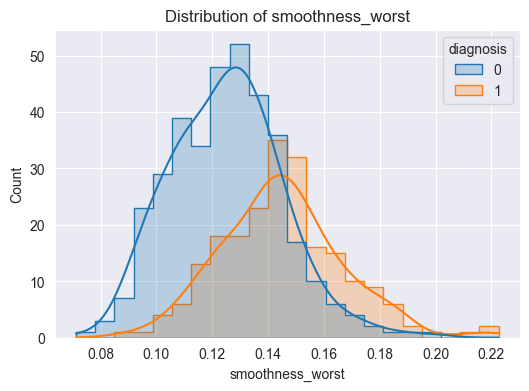

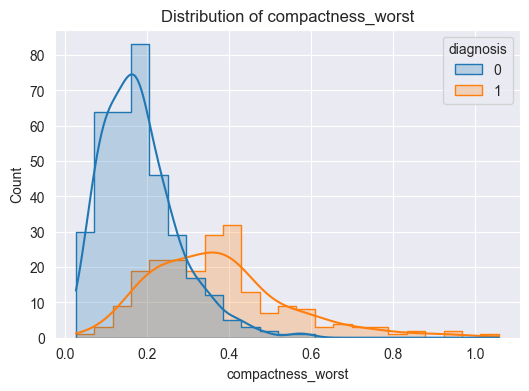

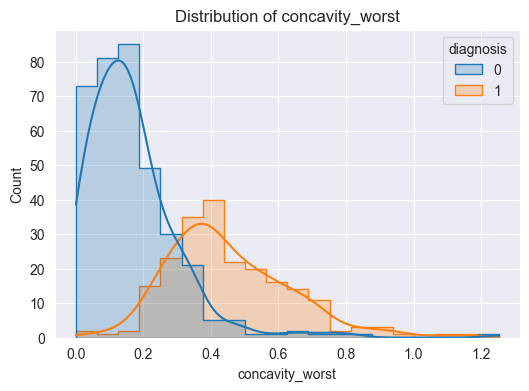

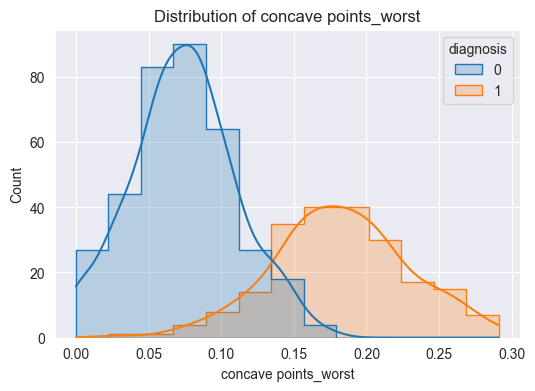

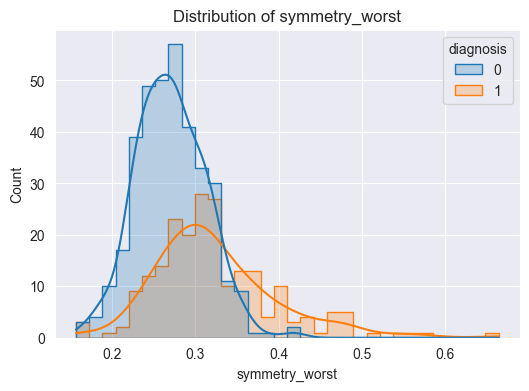

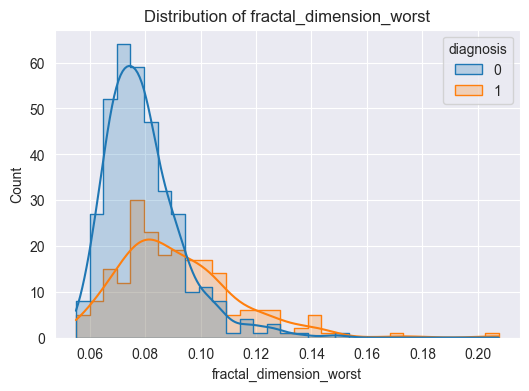

In [11]:
for column in data.columns[2:-1]:
    plt.figure(figsize=(6, 4))
    sns.histplot(data, x=column, hue='diagnosis', kde=True, element='step')  # Replace 'target' with actual column name
    plt.title(f'Distribution of {column}')
    plt.show()

<p>From the above plot, Many features such as area_mean, radius_mean, and perimeter_mean are right-skewed (i.e., long tail to the right).
This indicates that most tumors are small/medium-sized, but a few large ones exist.</p>
<p>A right-skewed distribution (also called positively skewed) looks like this:
Most of the data values are concentrated on the left side (lower values).
The tail stretches out to the right, meaning a few data points have very high values.
On a histogram, the peak is on the left and the bars gradually get smaller to the right.
</p>

In [12]:
#split the data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix

In [14]:
#Train model
lr=LogisticRegression(max_iter=10000,random_state=42)
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9626373626373627

In [15]:
y_pred=lr.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

In [16]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9561
Precision: 0.9750
Recall: 0.9070
F1 Score: 0.9398
Confusion Matrix:
[[70  1]
 [ 4 39]]


<h1>KNN</h1>

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=3)

In [18]:
knc.fit(X_train,y_train)
knc.score(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9494505494505494

In [19]:
y_pred=knc.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [20]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9298
Precision: 0.9268
Recall: 0.8837
F1 Score: 0.9048
Confusion Matrix:
[[68  3]
 [ 5 38]]


<h4>K=4</h4>

In [21]:
knc=KNeighborsClassifier(n_neighbors=4)
knc.fit(X_train,y_train)
knc.score(X_train,y_train)
y_pred=knc.predict(X_test)
y_pred

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [22]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9474
Precision: 1.0000
Recall: 0.8605
F1 Score: 0.9250
Confusion Matrix:
[[71  0]
 [ 6 37]]


<h4>k=5</h4>

In [23]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train,y_train)
knc.score(X_train,y_train)
y_pred=knc.predict(X_test)
y_pred

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [24]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9561
Precision: 1.0000
Recall: 0.8837
F1 Score: 0.9383
Confusion Matrix:
[[71  0]
 [ 5 38]]


<h4>K=6</h4>

In [25]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train,y_train)
knc.score(X_train,y_train)
y_pred=knc.predict(X_test)
y_pred

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [26]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9561
Precision: 1.0000
Recall: 0.8837
F1 Score: 0.9383
Confusion Matrix:
[[71  0]
 [ 5 38]]


<h4>K=7</h4>

In [27]:
knc=KNeighborsClassifier(n_neighbors=5)
knc.fit(X_train,y_train)
knc.score(X_train,y_train)
y_pred=knc.predict(X_test)
y_pred

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [28]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9561
Precision: 1.0000
Recall: 0.8837
F1 Score: 0.9383
Confusion Matrix:
[[71  0]
 [ 5 38]]


<h1>Navie Bayes</h1>

In [29]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,y_train)
gnb.score(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9362637362637363

In [30]:
y_pred=gnb.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [31]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9302
F1 Score: 0.9639
Confusion Matrix:
[[71  0]
 [ 3 40]]


<h1>SVM</h1>

In [32]:
from sklearn.svm import SVC
reg=SVC()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9142857142857143

In [33]:
y_pred=reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [34]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9474
Precision: 1.0000
Recall: 0.8605
F1 Score: 0.9250
Confusion Matrix:
[[71  0]
 [ 6 37]]


<h1>Decision Tree</h1>

In [35]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
clf.score(X_train,y_train)

1.0

In [37]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

In [38]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9386
Precision: 0.9286
Recall: 0.9070
F1 Score: 0.9176
Confusion Matrix:
[[68  3]
 [ 4 39]]


<h1>Random Forest</h1>

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=23)
rf.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=23)

In [40]:
rf.score(X_train,y_train)

1.0

In [41]:
y_pred=rf.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

In [42]:
#Evaluation metrics
acc=accuracy_score(y_test,y_pred)
prec=precision_score(y_test,y_pred)
rec=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)

#print the results
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(cm)

Accuracy: 0.9649
Precision: 0.9756
Recall: 0.9302
F1 Score: 0.9524
Confusion Matrix:
[[70  1]
 [ 3 40]]


/var/folders/f8/mj2vjl493b1362dvk6tb7bvr0000gn/T/ipykernel_65983/3516415509.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')


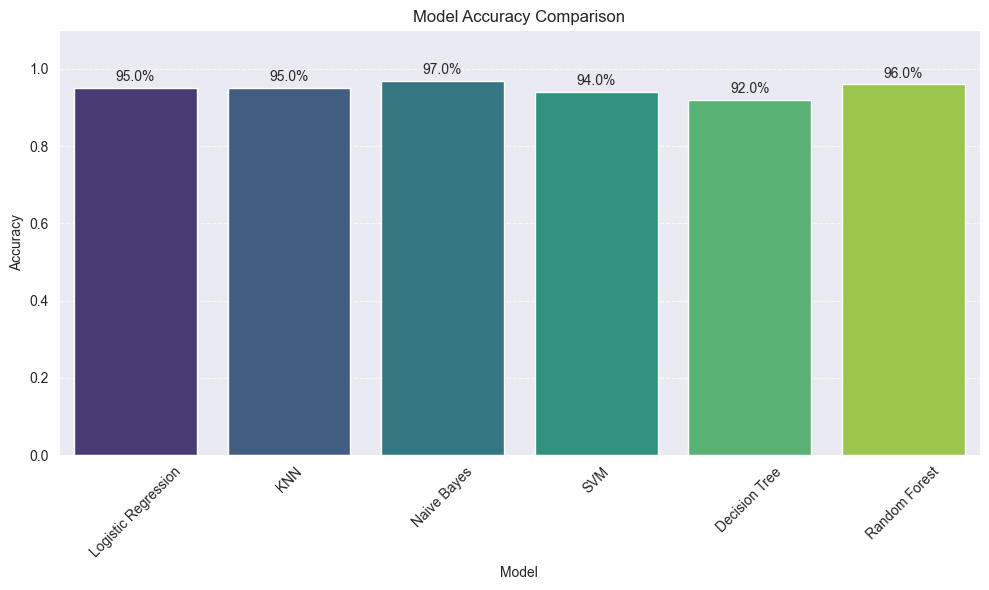

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
d = {
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.95, 0.95, 0.97, 0.94, 0.92, 0.96]
}

df = pd.DataFrame(d)

# Plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Model', y='Accuracy', data=df, palette='viridis')

# Add percentage labels on top of each bar
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.01,  # slightly above the bar
        f'{height * 100:.1f}%',  # format as percentage
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1.1)  # increased limit to accommodate text
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


<p>The bar plot will display the accuracy of each model on the test data, allowing you to easily compare their performances.</p>

<p>Based on the dataset and models, you will likely see that Naive Bayes and Random Forest tend to perform well, while SVM and Decision Tree might have slightly lower accuracy.</p>